In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



In [9]:
data_train_path = 'training'
data_test_path = 'testing'
data_val_path = 'validation'

In [10]:
img_width =128
img_height =128

In [11]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=10,
    validation_split=False)

Found 40 files belonging to 4 classes.


In [12]:
data_cat = data_train.class_names

In [47]:
data_cat

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=10,
    validation_split=False)

Found 40 files belonging to 4 classes.


In [14]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=10,
    validation_split=False)

Found 40 files belonging to 4 classes.


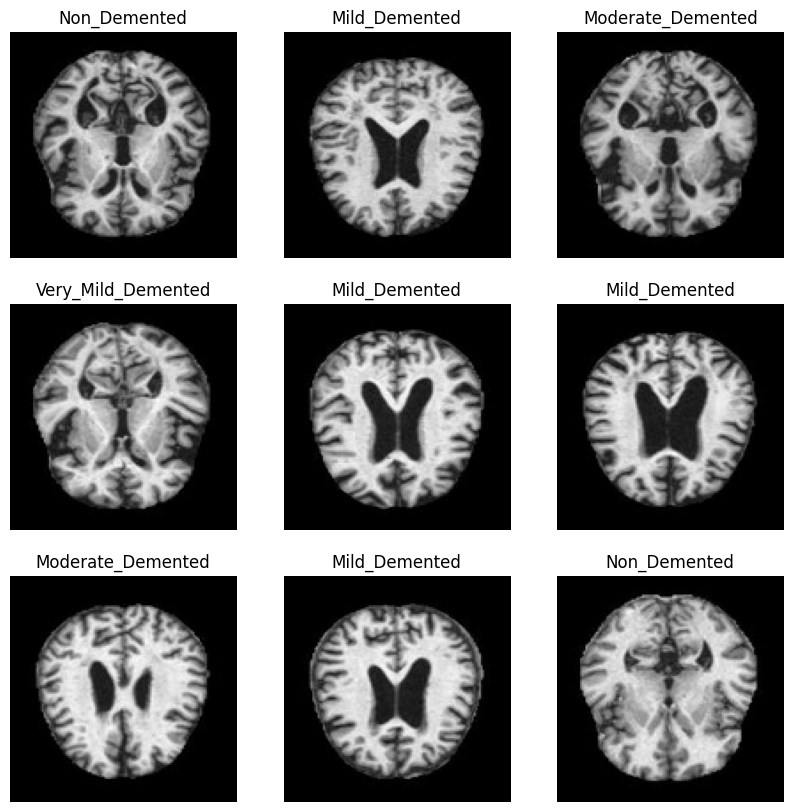

In [15]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same' , activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same' , activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same' , activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0,2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [20]:
model.compile(optimizer='adam' , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - accuracy: 0.3200 - loss: 2.7229 - val_accuracy: 0.3750 - val_loss: 1.5070
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.3300 - loss: 1.4684 - val_accuracy: 0.5250 - val_loss: 1.2271
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.5133 - loss: 1.3005 - val_accuracy: 0.7250 - val_loss: 1.1580
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5467 - loss: 1.1642 - val_accuracy: 0.7750 - val_loss: 1.0682
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5533 - loss: 1.0722 - val_accuracy: 0.7250 - val_loss: 0.8893
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.7033 - loss: 0.9111 - val_accuracy: 0.7500 - val_loss: 0.7375
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8033 - loss: 0.7072 - val_accuracy: 0.9500 - val_loss: 0.5889
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9467 - loss: 0.5767 - val_accuracy: 0.8500 - val_loss:

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')
                    

image = 'verymild.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [40]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [44]:
score = tf.nn.softmax(predict)

In [45]:
print('The level of Alzheimer is {} with accuracy of {:0.2f}' .format(data_cat[np.argmax(score)],np.max(score)*100))

The level of Alzheimer is Very_Mild_Demented with accuracy of 98.69


In [46]:
model.save('Image_Classify.keras')